# Visualisations

##### *Author - Srishti Sahu*

In [80]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to DB
conn = sqlite3.connect("../data/database.db")

# Load data with SQL
df_paintings = pd.read_sql("SELECT * FROM paintings", conn)
df_attributes = pd.read_sql("SELECT * FROM attributes", conn)

# Split attribute tables
size_lookup = df_attributes[df_attributes["attribute_type"] == "Size"].set_index("code")["description"]
colour_lookup = df_attributes[df_attributes["attribute_type"] == "Colourfulness"].set_index("code")["description"]  # Fixed!
brightness_lookup = df_attributes[df_attributes["attribute_type"] == "Brightness"].set_index("code")["description"]  # Added!

# Add readable columns to paintings
df_paintings["size_readable"] = df_paintings["size"].map(size_lookup)
df_paintings["colourfulness_readable"] = df_paintings["colourfulness"].map(colour_lookup)
df_paintings["brightness_readable"] = df_paintings["brightness"].map(brightness_lookup)

# Set a clean aesthetic
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)
palette = sns.color_palette("pastel")

print("Data loaded successfully!")
print(f"Shape: {df_paintings.shape}")
print("\nFirst few rows:")
print(df_paintings.head())

# Check if mappings worked
print(f"\nSize mapping worked: {df_paintings['size_readable'].notna().sum()} out of {len(df_paintings)}")
print(f"Colourfulness mapping worked: {df_paintings['colourfulness_readable'].notna().sum()} out of {len(df_paintings)}")
print(f"Brightness mapping worked: {df_paintings['brightness_readable'].notna().sum()} out of {len(df_paintings)}")

Data loaded successfully!
Shape: (75, 10)

First few rows:
   painting_id             artist                          painting_name  \
0            1     Paolo veronese                                  Scorn   
1            2      Paris Bordone                       A pair of lovers   
2            3     Paolo veronese  The family of Darius before Alexander   
3            4  Jacopo Tintoretto                The origin of Milky Way   
4            5  Jacopo Tintoretto            Saint George and the dragon   

  colourfulness brightness size  people_near size_readable  \
0             M       Dull    L            1         Large   
1             M     Bright    M            1        Medium   
2             H   Moderate    L            5         Large   
3             H     Bright    L            3         Large   
4             H   Moderate    M            2        Medium   

  colourfulness_readable brightness_readable  
0                 Medium                Dull  
1                

/tmp/ipykernel_367/4284494404.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_paintings, x='size_readable', y='people_near', ci=None, order=order)


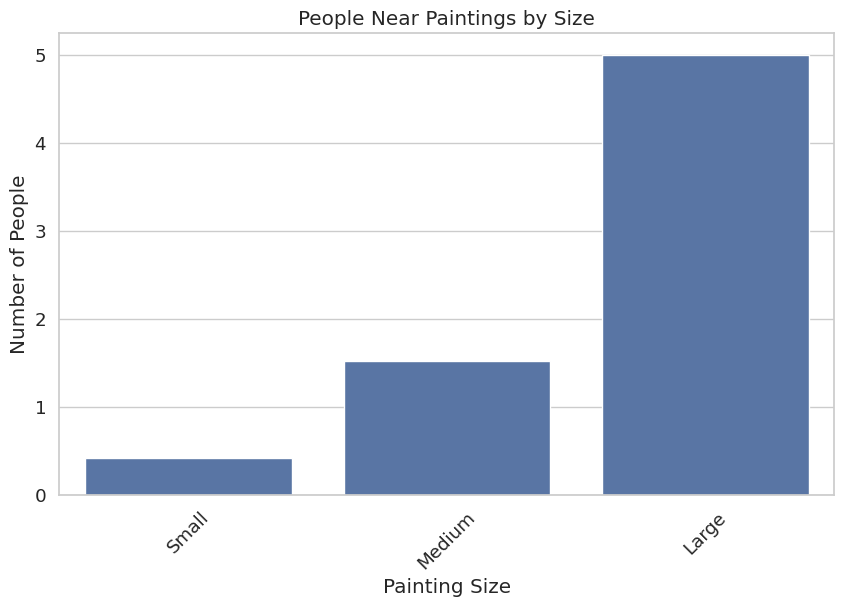

In [81]:
order = ['Small', 'Medium', 'Large']
sns.barplot(data=df_paintings, x='size_readable', y='people_near', ci=None, order=order)
plt.title('People Near Paintings by Size')
plt.xlabel('Painting Size')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.savefig("./images/size_plot.png")

The plot clearly shows that large - sized paintings catch people's eyes muc much more!

/tmp/ipykernel_367/1665140863.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_paintings, x='colourfulness_readable', y='people_near', ci=None, order=order)


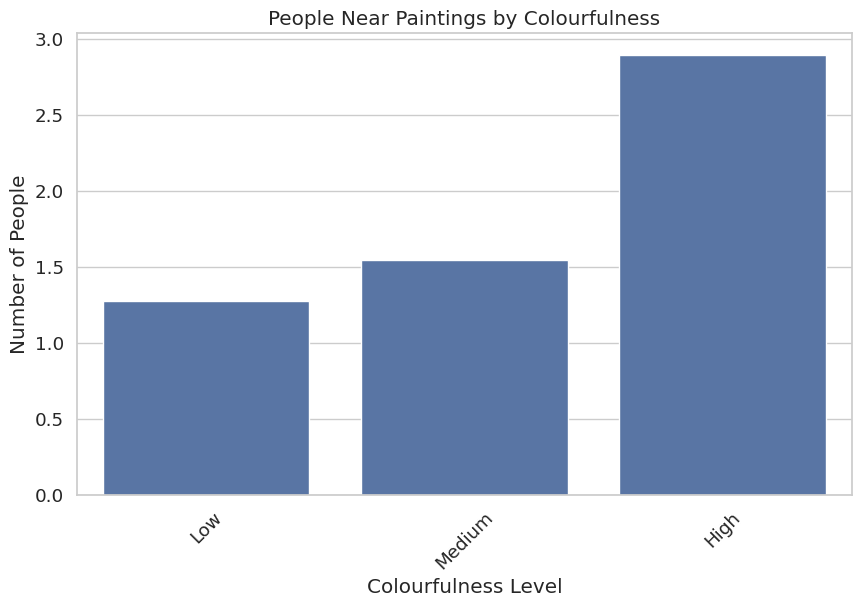

In [82]:
order = ['Low', 'Medium', 'High']
sns.barplot(data=df_paintings, x='colourfulness_readable', y='people_near', ci=None, order=order)
plt.title('People Near Paintings by Colourfulness')
plt.xlabel('Colourfulness Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.savefig("./images/colourfulness_plot.png")

And ofcourse, people find it more fascinating to look at paintings with a wide ranged colour palette

/tmp/ipykernel_367/1975228438.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_paintings, x='brightness_readable', y='people_near', ci=None, order=order)


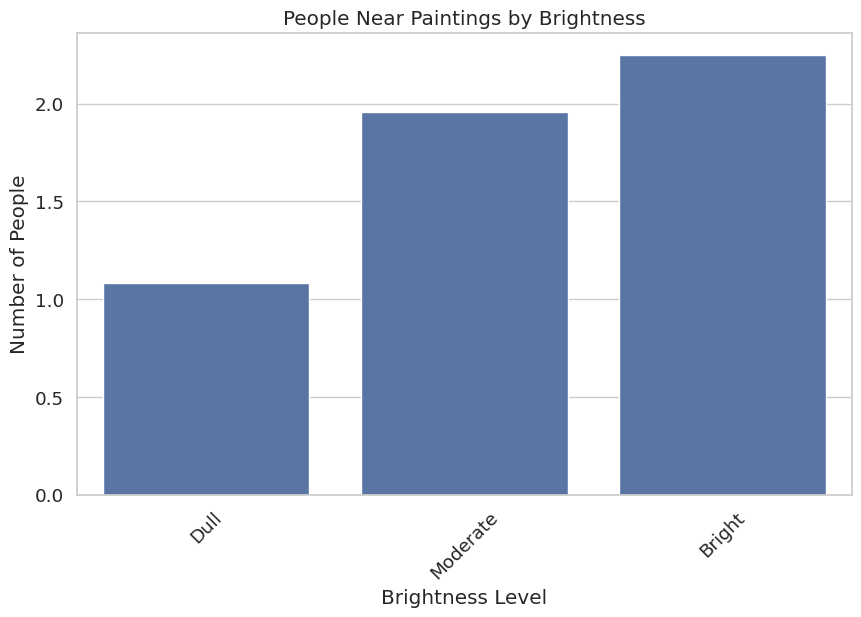

In [83]:
order = ['Dull', 'Moderate', 'Bright']
sns.barplot(data=df_paintings, x='brightness_readable', y='people_near', ci=None, order=order)
plt.title('People Near Paintings by Brightness')
plt.xlabel('Brightness Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.savefig("./images/brightness_plot.png")

Although the difference between the moderate and bright bars isn't much, clearly, brighter paintings attract more number of people

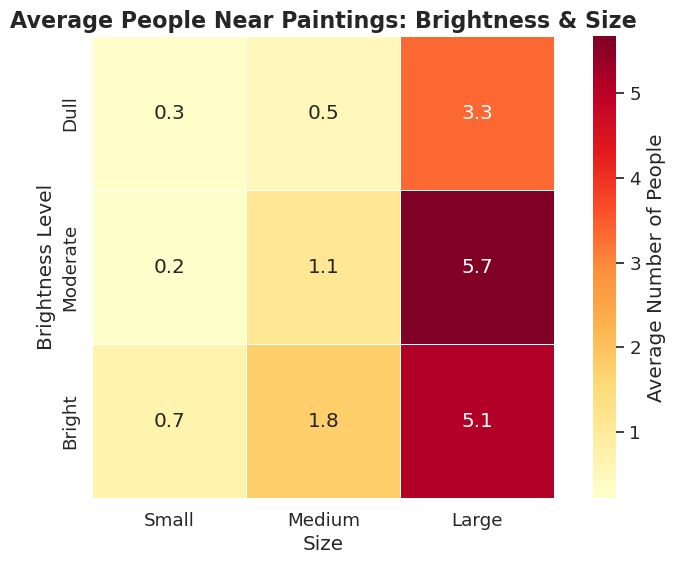

In [84]:
combo_data = df_paintings.pivot_table(
    values='people_near', 
    index='brightness_readable', 
    columns='size_readable', 
    aggfunc='mean'
)

combo_data = combo_data.reindex(['Dull', 'Moderate', 'Bright']).reindex(['Small', 'Medium', 'Large'], axis=1)

sns.heatmap(combo_data, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Number of People'},
            square=True,
            linewidths=0.5)

plt.title('Average People Near Paintings: Brightness & Size', 
          fontsize=16, fontweight='bold')
plt.xlabel('Size')
plt.ylabel('Brightness Level')
plt.savefig("./images/brightness+size_plot.png")
plt.show()

Although brightness and size show direct relations when compared individually (shown by the bar charts above), the combined heatmap shows that the most popular painting had moderate brightness and was large-sized. This might be due to an anomaly! Let's check it using a box plot 👇🏼

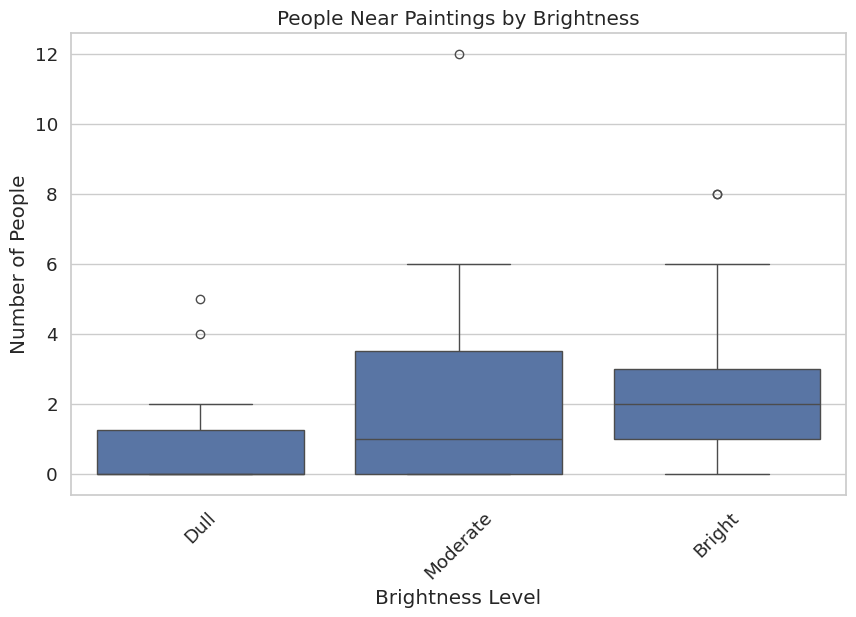

In [85]:
order = ['Dull', 'Moderate', 'Bright']
sns.boxplot(data=df_paintings, x='brightness_readable', y='people_near', order=order)
plt.title('People Near Paintings by Brightness')
plt.xlabel('Brightness Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.savefig("./images/brightness+size_boxplot.png")

Anomaly!!!

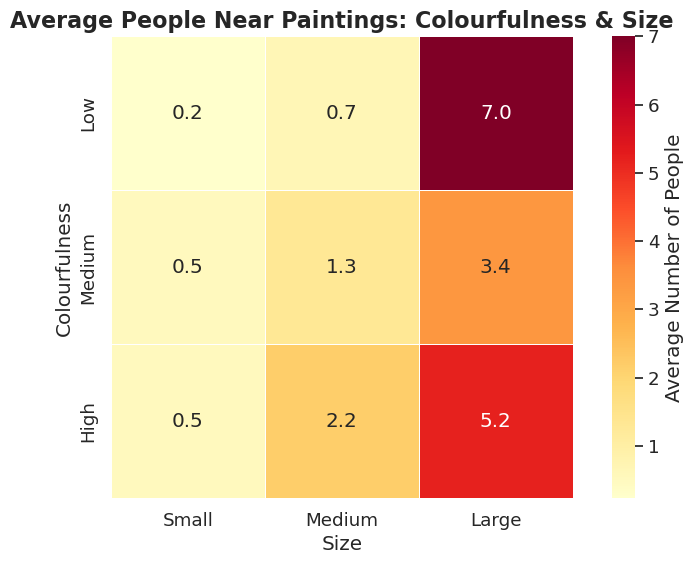

In [86]:
combo_data = df_paintings.pivot_table(
    values='people_near', 
    index='colourfulness_readable', 
    columns='size_readable', 
    aggfunc='mean'
)

combo_data = combo_data.reindex(['Low', 'Medium', 'High']).reindex(['Small', 'Medium', 'Large'], axis=1)

sns.heatmap(combo_data, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Number of People'},
            square=True,
            linewidths=0.5)

plt.title('Average People Near Paintings: Colourfulness & Size', 
          fontsize=16, fontweight='bold')
plt.xlabel('Size')
plt.ylabel('Colourfulness')
plt.savefig("./images/colourfulness+size_plot.png")
plt.show()

Although colourfulness and size show direct relations when compared individually (shown by the bar charts), the combined heatmap shows that the most popular painting had low brightness and was large-sized. This might be due to an anomaly! Let's check it using a box plot 👇🏼

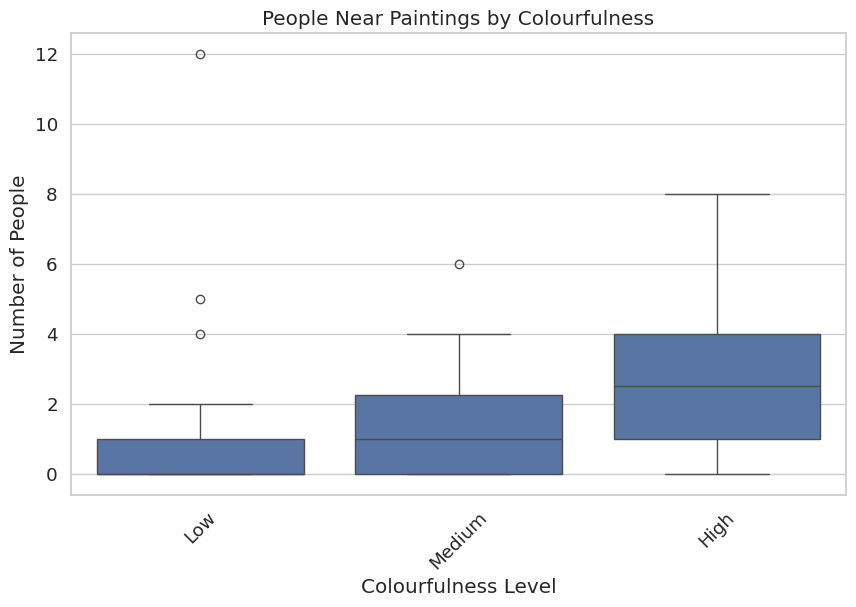

In [87]:
order = ['Low', 'Medium', 'High']
sns.boxplot(data=df_paintings, x='colourfulness_readable', y='people_near', order=order)
plt.title('People Near Paintings by Colourfulness')
plt.xlabel('Colourfulness Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.savefig("./images/colourfulness+size_boxplot.png")

Anomaly!!!